# Overall Implementation

In [1]:
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
random.seed(42)
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [ ]:
# Train / Dev / Test Split 

def build_dataset(words):
    block_size = 5
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)

            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    
    print(X.shape, Y.shape)

    return X, Y

random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 5]) torch.Size([182625])
torch.Size([22655, 5]) torch.Size([22655])
torch.Size([22866, 5]) torch.Size([22866])


In [27]:
g = torch.Generator().manual_seed(2344332)

C = torch.randn(size=(27, 10), generator=g)

W1 = torch.randn(size=(50, 300), generator=g)
b1 = torch.randn(300, generator=g)

W2 = torch.randn(size=(300, 27), generator=g)
b2 = torch.randn(27, generator=g)

params = [C, W1, b1, W2, b2]

In [28]:
sum(p.nelement() for p in params)

23697

In [29]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [30]:
for p in params:
    p.requires_grad = True

In [31]:
lri = []
lossi = []
best_lr = []

In [32]:
for i in range(200000):

    # mini batch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 50) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in params:
        p.grad = None
    loss.backward()

    # update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in params:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lr)
    # lossi.append(loss.item())

print(loss.item())

1.8779408931732178


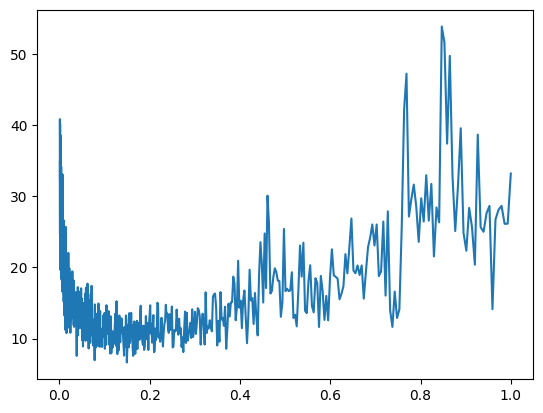

In [10]:
plt.plot(lri, lossi)

In [11]:
min_lossi = lossi.index(min(lossi))
best_lr = lri[min_lossi]
best_lr

tensor(0.1493)

In [33]:
# validation loss
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 50) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.225658893585205

In [34]:
# test loss
emb = C[Xte]
h = torch.tanh(emb.view(-1, 50) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss.item()

2.2207305431365967

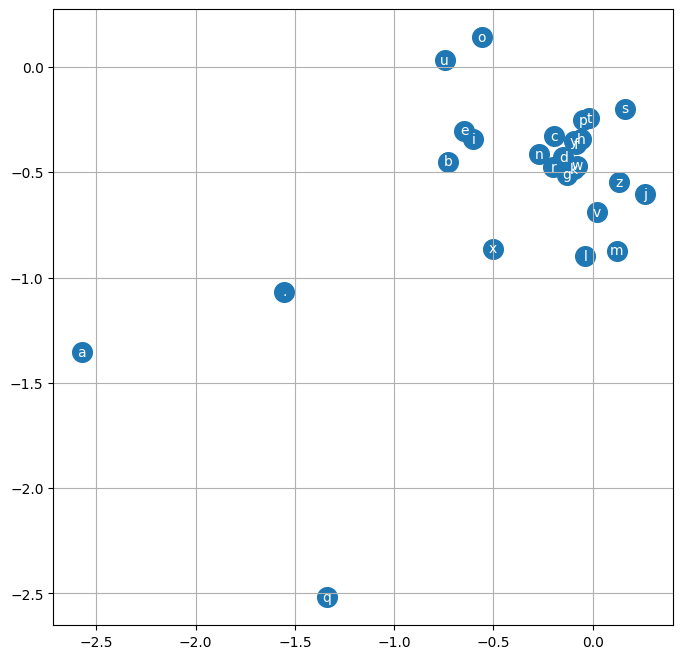

In [35]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [23]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * 5 # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

monavimyah.
seelen.
hayla.
tethaniejg.
leg.
azery.
seliiah.
poren.
edelies.
anara.
pyziqu.
karin.
shurerg.
hirie.
trini.
welle.
xatpuor.
ubrwond.
ryyah.
fael.
